In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

#for modeling
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report

In [50]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [52]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [53]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [54]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [55]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [56]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

## **Split DataSet**

In [57]:
y = df['math score']
x = df.drop('math score', axis = 1)

In [58]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [59]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [60]:
#select numerical data
numerical_df = x.select_dtypes(exclude = 'object').columns

In [61]:
numerical_df

Index(['reading score', 'writing score'], dtype='object')

In [62]:
#select categorical data
categorical_df = x.select_dtypes(include = 'object').columns

In [63]:
categorical_df

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

## **Data Preprocessing**

In [64]:
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

In [65]:
categorical_df = [feature for feature in categorical_df if feature != 'parental level of education']

In [66]:
categorical_df

['gender', 'race/ethnicity', 'lunch', 'test preparation course']

In [67]:
x['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [68]:
ordinal_encoder = OrdinalEncoder(categories = [['some high school', 'high school', 'some college',
                                               "associate's degree", "bachelor's degree",
                                               "master's degree"]])

In [69]:
preprocessing = ColumnTransformer([
    ('OneHotEncoder', one_hot_encoder, categorical_df),
    ('OrdinalEncoder', ordinal_encoder, ['parental level of education']),
    ('StandardScaler', scaler, numerical_df)
])

In [70]:
x = preprocessing.fit_transform(x)

In [71]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  4.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  5.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.15336989,  1.18158627]])

## **Data Splitting**

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

## **Model Training**

In [73]:
def evaluate_model(actual, predicted):
    
    MAE = mean_absolute_error(actual, predicted)
    MSE = mean_squared_error(actual, predicted)
    RMSE = np.sqrt(mean_squared_error(actual, predicted))
    R2_Score = r2_score(actual, predicted)
    
    return MAE, MSE, RMSE, R2_Score

In [74]:
models = {
    "Linear Regression Model" : LinearRegression(),
    "KNN Model" : KNeighborsRegressor(),
    "Decision Tree Model" : DecisionTreeRegressor(),
    "Random Forest Model" : RandomForestRegressor(),
    "XGBOOST Model" :XGBRegressor()
}

In [75]:
models_list = []
r2_list = []

In [76]:
for i in range(len(list(models))):
    #models ---> values
    model = list(models.values())[i]
    #fit model
    model.fit(x_train, y_train)
    
    #model prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #model evaluation
    Train_MAE , Train_MSE, Train_RMSE, Train_R2 = evaluate_model(y_train, y_train_pred)
    Test_MAE , Test_MSE, Test_RMSE, Test_R2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print("Model Training Performance : ")
    print("Mean Absolut Error = ", Train_MAE)
    print("Mean Squared Error = ", Train_MSE)
    print("Root Mean Squared Error = ", Train_RMSE)
    print("R2 Score Error = ", Train_R2)
    print("-------------------------------------")
    print("Model Testing Performance : ")
    print("Mean Absolut Error = ", Test_MAE)
    print("Mean Squared Error = ", Test_MSE)
    print("Root Mean Squared Error = ", Test_RMSE)
    print("R2 Score Error = ", Test_R2)
    print("\n")
    
    r2_list.append(Test_R2)

Linear Regression Model
Model Training Performance : 
Mean Absolut Error =  4.260395833333333
Mean Squared Error =  28.296205403645832
Root Mean Squared Error =  5.31941776923432
R2 Score Error =  0.87321852035047
-------------------------------------
Model Testing Performance : 
Mean Absolut Error =  4.3135625
Mean Squared Error =  29.5539814453125
Root Mean Squared Error =  5.436357369168485
R2 Score Error =  0.8798734352592097


KNN Model
Model Training Performance : 
Mean Absolut Error =  4.525066666666667
Mean Squared Error =  32.21136
Root Mean Squared Error =  5.6755052638509635
R2 Score Error =  0.8556766243364382
-------------------------------------
Model Testing Performance : 
Mean Absolut Error =  5.6168000000000005
Mean Squared Error =  51.04559999999999
Root Mean Squared Error =  7.1446203538046715
R2 Score Error =  0.7925175467650889


Decision Tree Model
Model Training Performance : 
Mean Absolut Error =  0.02
Mean Squared Error =  0.08333333333333333
Root Mean Squared 

In [77]:
scores_df = pd.DataFrame(list(zip(models_list, r2_list)), 
                         columns = ['Model Name', 'R2 Score']).sort_values(by = ['R2 Score'], 
                            ascending = False) 

In [78]:
scores_df

,Model Name,R2 Score
0,Linear Regression Model,0.879873
3,Random Forest Model,0.850297
4,XGBOOST Model,0.821958
1,KNN Model,0.792518
2,Decision Tree Model,0.767128


In [79]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

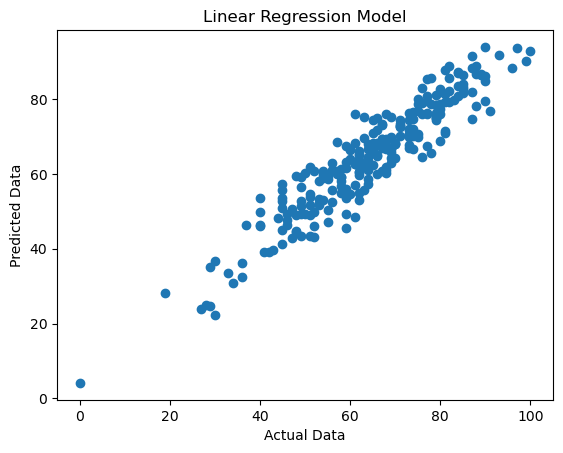

In [80]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title("Linear Regression Model")
plt.show()

<Axes: xlabel='math score'>

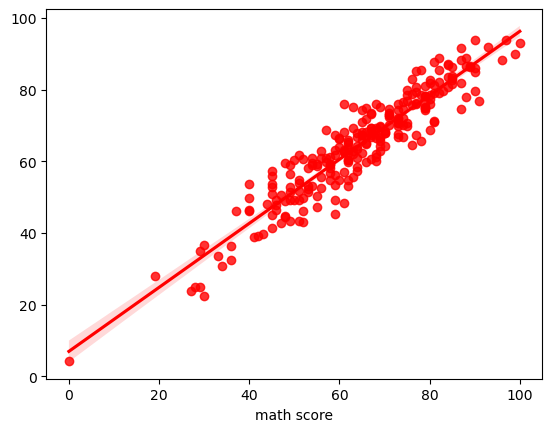

In [81]:
sns.regplot(x = y_test, y = y_pred, color = 'red')

In [82]:
prediction_df = pd.DataFrame({'Actual Values': y_test,
                             "Predicted Values" : y_pred,
                             "Diff" : y_test - y_pred})
prediction_df

,Actual Values,Predicted Values,Diff
521,91,76.734375,14.265625
737,53,58.000000,-5.000000
740,80,77.375000,2.625000
660,74,76.609375,-2.609375
411,84,86.921875,-2.921875
...,...,...,...
109,70,64.187500,5.812500
430,64,63.453125,0.546875
77,80,82.640625,-2.640625
84,42,39.218750,2.781250


## **Classification Project**

In [106]:
df = pd.read_csv("XGBOOST_Data.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [108]:
df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [109]:
df.drop(columns = ['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [110]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [111]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [112]:
df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [113]:
gender_map = {"Male" : 1, "Female" : 0}
customer_map = {"Loyal Customer": 1, "disloyal Customer" :0}
travel_map = {"Business travel":1, "Personal Travel":0}
class_map = {"Business" : 1, "Eco" : 2, "Eco Plus" :3}
satisfaction_map = {"satisfied": 1, "neutral or dissatisfied":0}

In [114]:
df.Gender = df.Gender.map(gender_map)
df['Customer Type'] = df['Customer Type'].map(customer_map)
df['Type of Travel'] = df['Type of Travel'].map(travel_map)
df['Class'] = df['Class'].map(class_map)
df['satisfaction'] = df['satisfaction'].map(satisfaction_map)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,52,1,2,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,1,36,1,1,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,0,20,1,2,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,1,44,1,1,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,1,49,1,2,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [115]:
#handle missing values 
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [116]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [117]:
y = df.satisfaction
x = df.drop('satisfaction', axis = 1)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [120]:
x['Type of Travel'].unique()

array([1, 0], dtype=int64)

In [101]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [103]:
def evaluate_model(actual, prediction):
    accuracy_score_model = accuracy_score(actual, prediction)
    classification_report_model = classification_report(actual, prediction)
    return accuracy_score_model, classification_report_model

In [122]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'XGBOOST': XGBClassifier()
}

In [123]:
models_list = []
train_accuracies = []
test_accuracies = []
for i in range(len(list(models))):
    #models ---> values
    model = list(models.values())[i]
    #fit model
    model.fit(x_train, y_train)
    
    #model prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #model evaluation
    Train_accuracy, Train_classification_report = evaluate_model(y_train, y_train_pred)
    Test_accuracy, Test_classification_report = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print("Model Training Performance : ")
    print("train Accuracy = ", Train_accuracy)
    print("Train Classification Report : ")
    print(Train_classification_report)
    print("-------------------------------------")
    print("Model Testing Performance : ")
    print("train Accuracy = ", Test_accuracy)
    print("Test Classification Report : ")
    print(Test_classification_report)
    print("\n")
    
    train_accuracies.append(Train_accuracy)
    test_accuracies.append(Test_accuracy)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model Training Performance : 
train Accuracy =  0.8108672936259144
Train Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     10162
           1       0.77      0.81      0.79      8021

    accuracy                           0.81     18183
   macro avg       0.81      0.81      0.81     18183
weighted avg       0.81      0.81      0.81     18183

-------------------------------------
Model Testing Performance : 
train Accuracy =  0.8005902733222122
Test Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4411
           1       0.76      0.80      0.78      3382

    accuracy                           0.80      7793
   macro avg       0.80      0.80      0.80      7793
weighted avg       0.80      0.80      0.80      7793



KNN
Model Training Performance : 
train Accuracy =  0.802562833415828
Train Classification R

In [124]:
accuracy_df = pd.DataFrame(list(zip(models_list, train_accuracies, test_accuracies)),
                          columns = ['Model Name', 'Train Accuracy', 'Test Accuracy'])

In [125]:
accuracy_df

,Model Name,Train Accuracy,Test Accuracy
0,Logistic Regression,0.810867,0.800590
1,KNN,0.802563,0.689080
2,Decision Tree,1.000000,0.931990
3,Random Forest,1.000000,0.948415
4,XGBOOST,0.994830,0.955216
